Provide information on the following data for a (fictional) reporter's newspaper.

## Library Importation

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

import glob

## Data Importation and Cleaning

### Importing Crime Data

In [2]:
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
1,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
2,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
3,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
4,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783202 entries, 0 to 71728
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 668.0+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10364
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 86787
Longitude                86787
dtype: int64

In [6]:
(df.isna().sum()/len(df)) * 100

ID                      0.000000
Date                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.133159
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000604
Ward                    7.899679
Latitude                1.115055
Longitude               1.115055
dtype: float64

Less than 2% of data is missing in the following features, so the missing rows can be dropped: Location Description, Latitude, and Longitude, and District.

In [7]:
#Dropping NA rows
df = df.dropna(subset = ["Location Description", "Latitude", "Longitude", "District"])
(df.isna().sum()/len(df)) * 100

ID                      0.00000
Date                    0.00000
Primary Type            0.00000
Description             0.00000
Location Description    0.00000
Arrest                  0.00000
Domestic                0.00000
Beat                    0.00000
District                0.00000
Ward                    7.87528
Latitude                0.00000
Longitude               0.00000
dtype: float64

In [17]:
#Converting date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.info()

KeyError: 'Date'

In [9]:
#Setting date as index
df = df.set_index("Date")
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
2001-01-01 01:00:00,1309918,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
2001-01-01 01:00:00,1323691,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185


In [44]:
#Cleaning Primary Type
df["Primary Type"].value_counts().sort_values(ascending = False)

THEFT                                1620013
BATTERY                              1416565
CRIMINAL DAMAGE                       882514
NARCOTICS                             735175
ASSAULT                               504993
OTHER OFFENSE                         479299
BURGLARY                              422672
MOTOR VEHICLE THEFT                   371913
DECEPTIVE PRACTICE                    320416
ROBBERY                               290786
CRIMINAL TRESPASS                     213238
WEAPONS VIOLATION                     105843
PROSTITUTION                           69171
PUBLIC PEACE VIOLATION                 52071
OFFENSE INVOLVING CHILDREN             51970
SEX OFFENSE                            28815
CRIM SEXUAL ASSAULT                    26142
INTERFERENCE WITH PUBLIC OFFICER       18317
LIQUOR LAW VIOLATION                   14760
GAMBLING                               14520
ARSON                                  13158
HOMICIDE                               12543
KIDNAPPING

In [48]:
corrections = {"NON - CRIMINAL": "NON-CRIMINAL",
               "CRIM SEXUAL ASSAULT": "CRIMINAL SEXUAL ASSAULT"}
df.replace(corrections, inplace = True)
#Cleaning Primary Type
df["Primary Type"].value_counts().sort_values(ascending = False)

THEFT                                1620013
BATTERY                              1416565
CRIMINAL DAMAGE                       882514
NARCOTICS                             735175
ASSAULT                               504993
OTHER OFFENSE                         479299
BURGLARY                              422672
MOTOR VEHICLE THEFT                   371913
DECEPTIVE PRACTICE                    320416
ROBBERY                               290786
CRIMINAL TRESPASS                     213238
WEAPONS VIOLATION                     105843
PROSTITUTION                           69171
PUBLIC PEACE VIOLATION                 52071
OFFENSE INVOLVING CHILDREN             51970
CRIMINAL SEXUAL ASSAULT                32022
SEX OFFENSE                            28815
INTERFERENCE WITH PUBLIC OFFICER       18317
LIQUOR LAW VIOLATION                   14760
GAMBLING                               14520
ARSON                                  13158
HOMICIDE                               12543
KIDNAPPING

This is a space for future work regarding imputing data for Wards. The dataset can be used as is to answer the following questions.

In [10]:
df.corr(numeric_only = True)

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,1.000000,-0.098209,0.064080,-0.039166,-0.005149,0.021283,-0.000852,0.007057
Arrest,-0.098209,1.000000,-0.067702,-0.014277,-0.016629,-0.016440,0.000488,-0.032737
Domestic,0.064080,-0.067702,1.000000,-0.045989,-0.042355,-0.055894,-0.081767,0.006597
Beat,-0.039166,-0.014277,-0.045989,1.000000,0.946473,0.642336,0.621225,-0.488075
District,-0.005149,-0.016629,-0.042355,0.946473,1.000000,0.685502,0.628602,-0.536879
Ward,0.021283,-0.016440,-0.055894,0.642336,0.685502,1.000000,0.635940,-0.441954
Latitude,-0.000852,0.000488,-0.081767,0.621225,0.628602,0.635940,1.000000,-0.456957
Longitude,0.007057,-0.032737,0.006597,-0.488075,-0.536879,-0.441954,-0.456957,1.000000


### Importing and Cleaning Holiday Data

In [11]:
#Creating dataframe for holidays in the USA
holiday_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv"
holiday_df = pd.read_csv(holiday_url)
holiday_df

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
1,2001-01-02,NaN,NaN
2,2001-01-03,NaN,NaN
3,2001-01-04,NaN,NaN
4,2001-01-05,NaN,NaN
...,...,...,...
7942,2022-09-30,NaN,NaN
7943,2022-10-01,NaN,NaN
7944,2022-10-02,NaN,NaN
7945,2022-10-03,NaN,NaN


In [12]:
#Cleaning holiday dataframe
holiday_df = holiday_df.dropna()
holiday_df

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
14,2001-01-15,Martin Luther King Jr. Day,Martin Luther King Jr. Day
49,2001-02-19,Washington's Birthday,Washington's Birthday
147,2001-05-28,Memorial Day,Memorial Day
184,2001-07-04,Independence Day,Independence Day
...,...,...,...
7819,2022-05-30,Memorial Day,Memorial Day
7839,2022-06-19,Juneteenth National Independence Day,Juneteenth National Independence Day
7840,2022-06-20,Juneteenth National Independence Day (Observed),Juneteenth National Independence Day (Observed)
7854,2022-07-04,Independence Day,Independence Day


## Which district has the most crimes? Which has the least?

District 8 has the most crimes at 523091 crimes, while District 21 has the least number of crimes at 4 crimes.

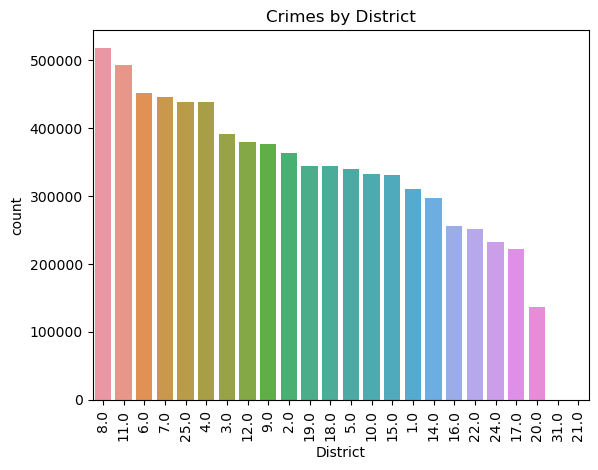

In [13]:
sns.countplot(data = df, 
              x = "District",
             order = df["District"].value_counts().index).set(title = "Crimes by District")

plt.xticks(rotation = 90)

plt.show()

In [14]:
df["District"].value_counts().sort_values(ascending = False)

8.0     518150
11.0    492542
6.0     450882
7.0     446248
25.0    437927
4.0     437876
3.0     390766
12.0    380058
9.0     376532
2.0     363272
19.0    344072
18.0    343971
5.0     339675
10.0    332017
15.0    330436
1.0     309678
14.0    297214
16.0    256455
22.0    251776
24.0    232100
17.0    222121
20.0    135765
31.0       234
21.0         4
Name: District, dtype: int64

## Is the total number of crimes increasing or decreasing across the years? Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

The total number of crimes has decreased over the years. From 2001 at 482875 crimes, decreasing to 232562 crimes in 2022.

Crimes that increased included: 
* Weapons Violations
* Interference with Public Officer
* Stalking
* Obscenity
* Criminal Sexual Assault
* Human Trafficking
* Concealed Carry License Violations


In [34]:
crime_trends = df.copy()
crime_trends["Year"] = df.index.year

### Is the total number of crimes increasing or decreasing?

Total number of crimes is decreasing, from 482,875 crimes in 2001 to 232,562 crimes in 2022. There is 2023 data, but as of this project, 2023 is not over, and therefore cannot provide a complete picture.

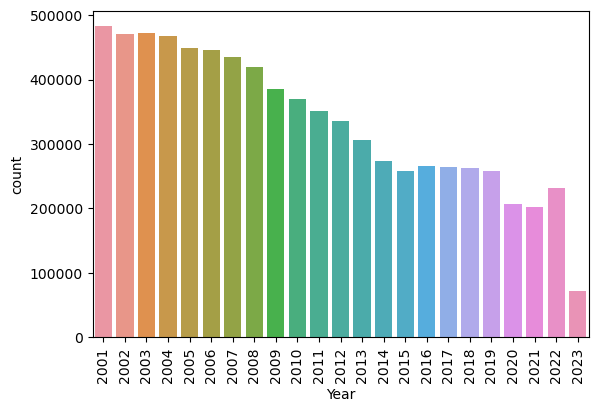

In [55]:
ax = sns.countplot(data=crime_trends, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = "center")

In [41]:
crime_trends["Year"].value_counts().sort_index(ascending = False)

2023     71061
2022    232562
2021    202257
2020    207448
2019    258176
2018    262838
2017    264157
2016    266482
2015    257790
2014    273612
2013    306329
2012    335128
2011    351093
2010    370007
2009    386049
2008    419996
2007    435688
2006    445545
2005    449917
2004    467197
2003    472039
2002    471525
2001    482875
Name: Year, dtype: int64

### Are any crimes increasing over the years?

Crimes that increase:
* Weapons Violations
* Interference with Public Officer
* Stalking
* Obscenity
* Criminal Sexual Assault
* Human Trafficking
* Concealed Carry License Violations

Crimes that remain relatively steady
* Offense Involving Children
* Deceptive Practice
* Homicide
* Other Narcotic Violations



In [51]:
crimes = {}
for crime in crime_trends["Primary Type"].unique():
    temp_filter = crime_trends["Primary Type"] == crime
    temp_df = crime_trends[temp_filter]
    crimes[crime] = temp_df
crimes.keys()

dict_keys(['CRIMINAL DAMAGE', 'BATTERY', 'THEFT', 'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'OTHER OFFENSE', 'PUBLIC PEACE VIOLATION', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'BURGLARY', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'NARCOTICS', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CRIMINAL SEXUAL ASSAULT', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'HUMAN TRAFFICKING', 'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION'])

/var/folders/z_/c_drbxf10fbfpphcpb2wk3mm0000gn/T/ipykernel_2818/918909740.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


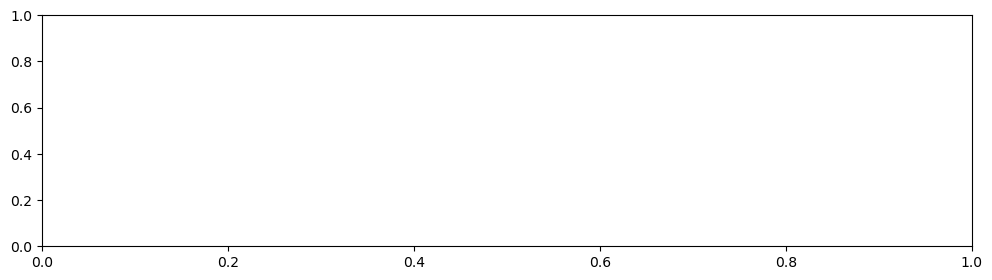

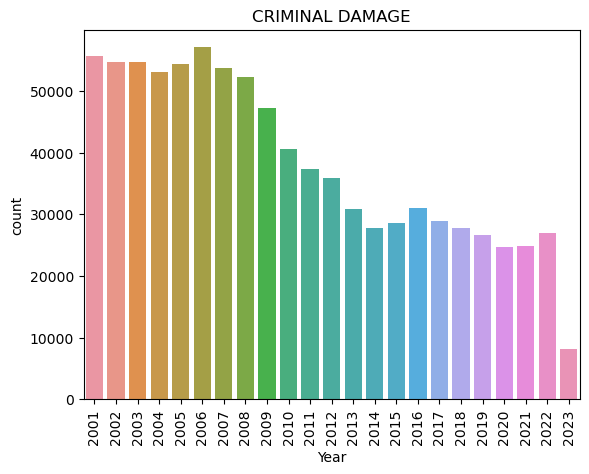

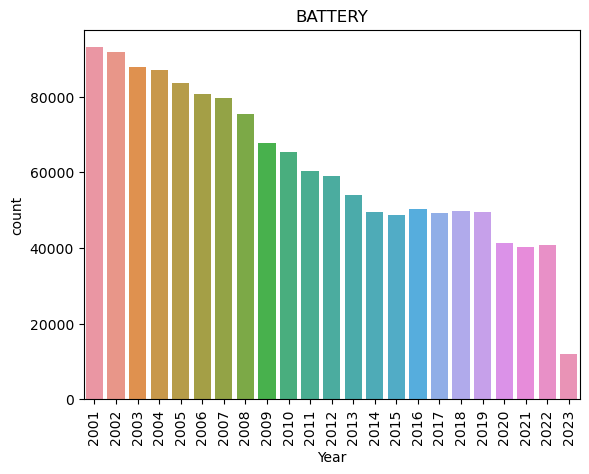

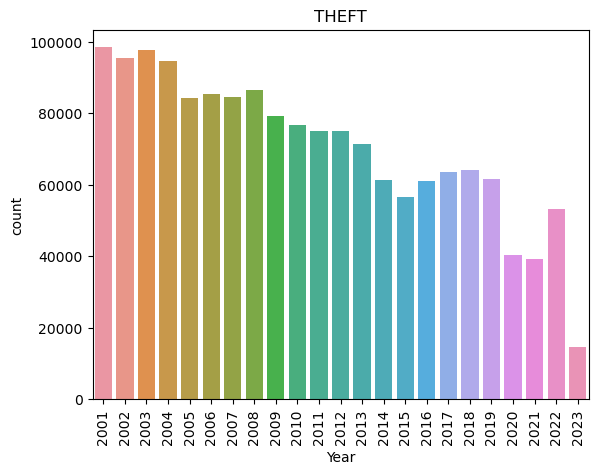

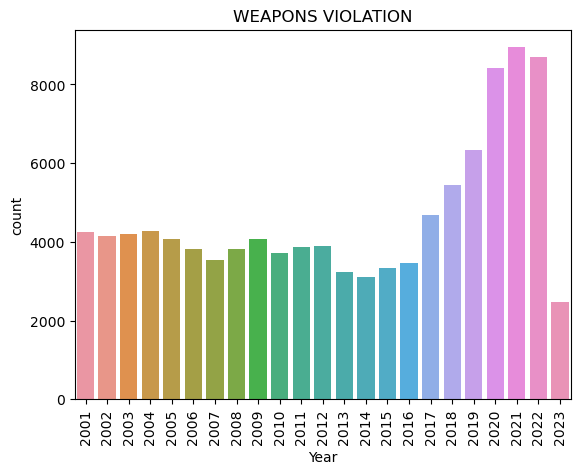

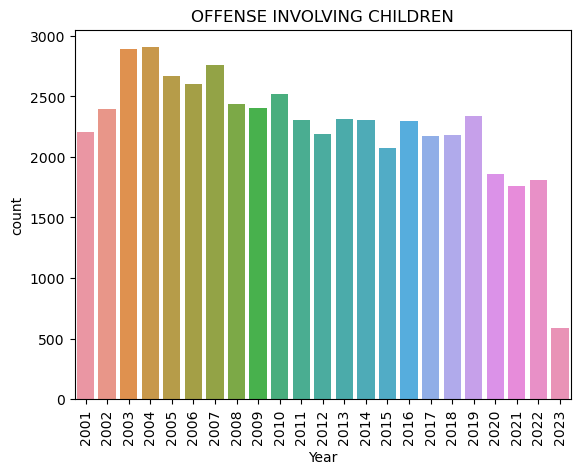

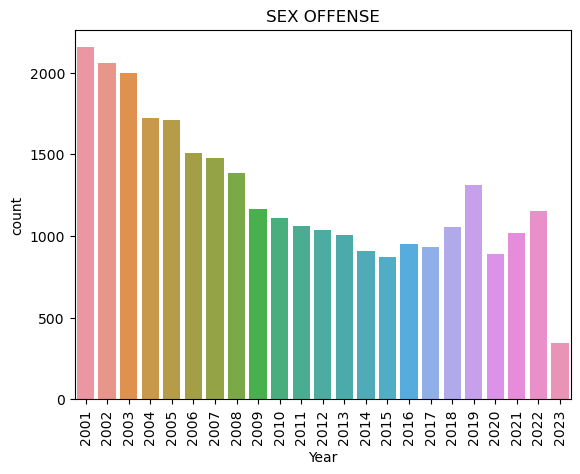

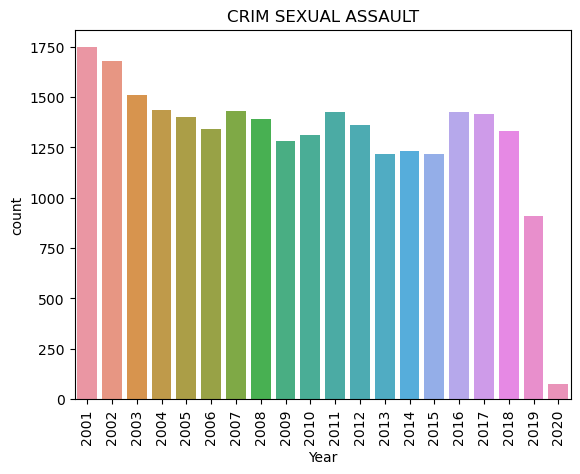

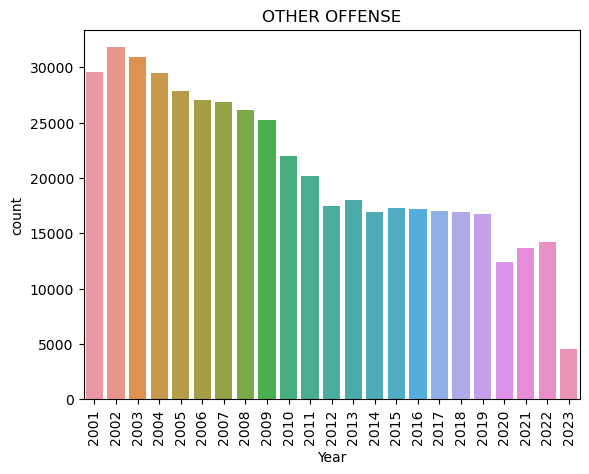

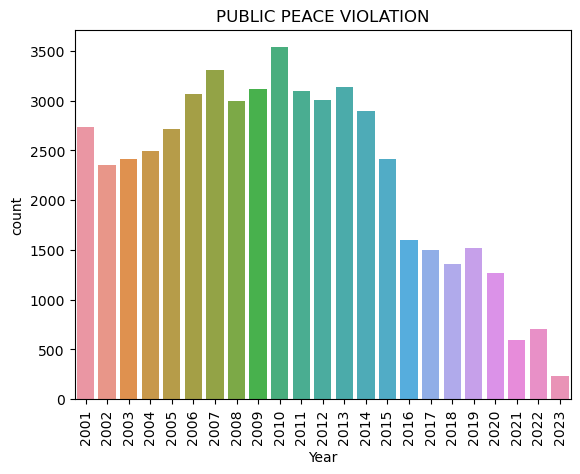

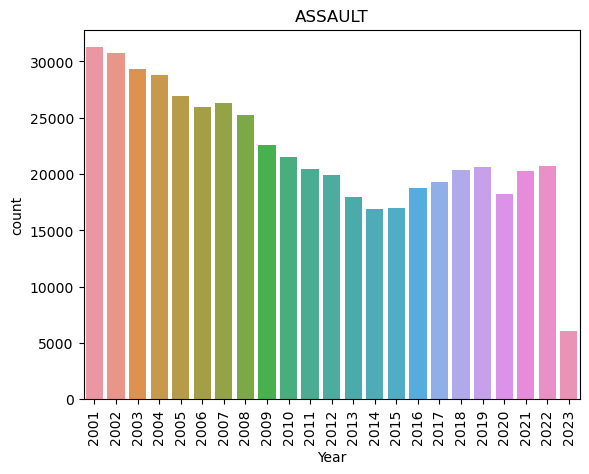

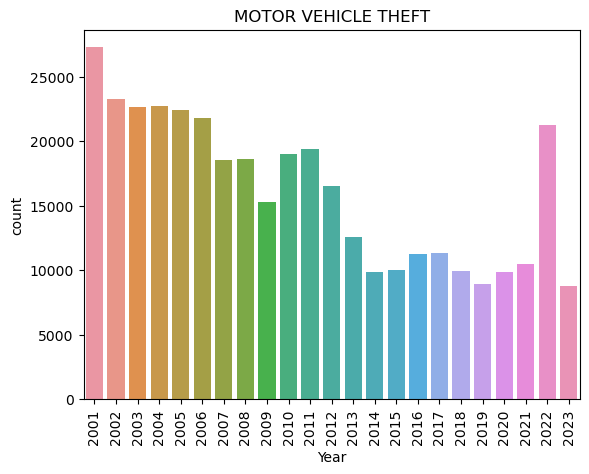

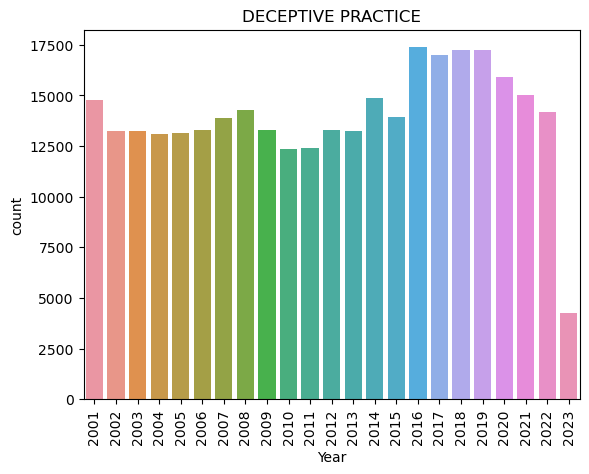

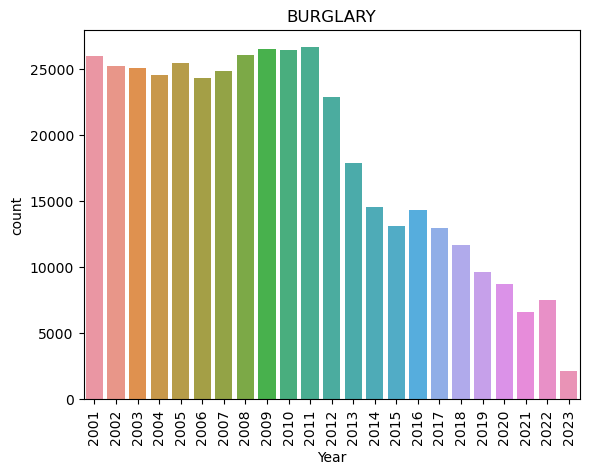

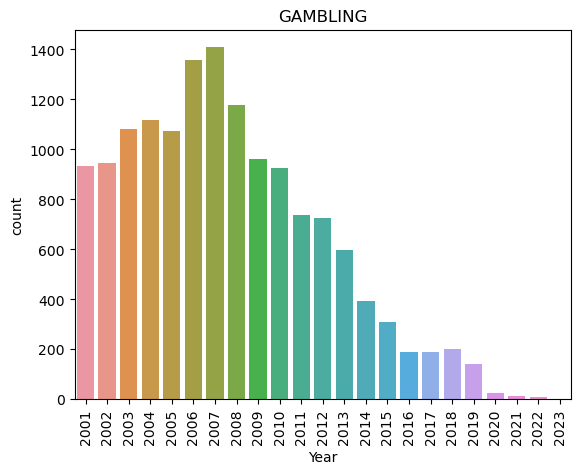

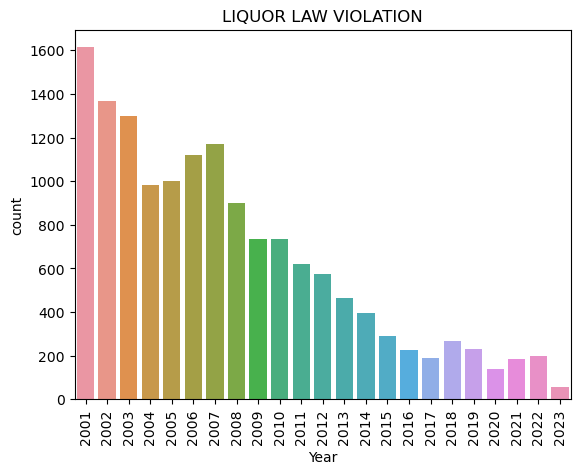

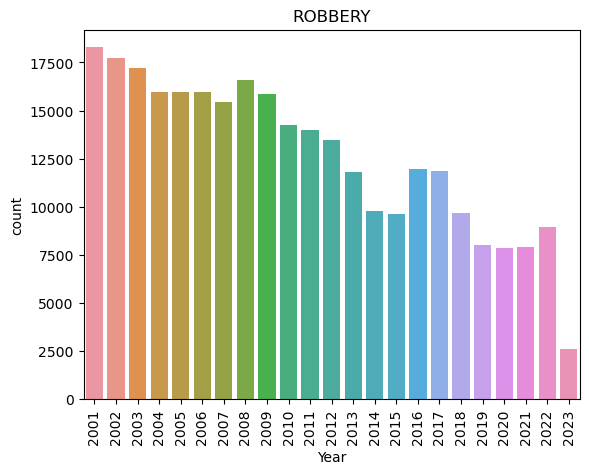

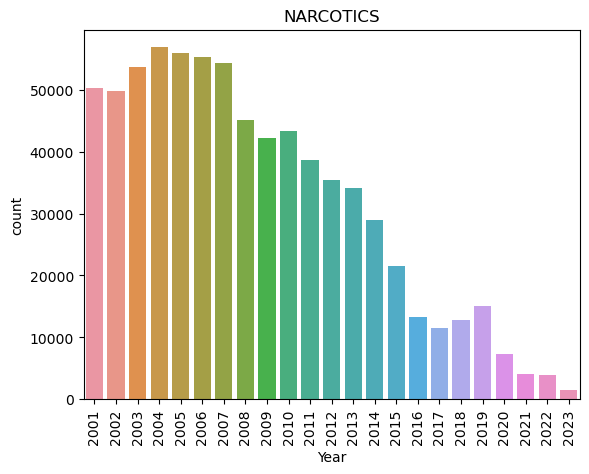

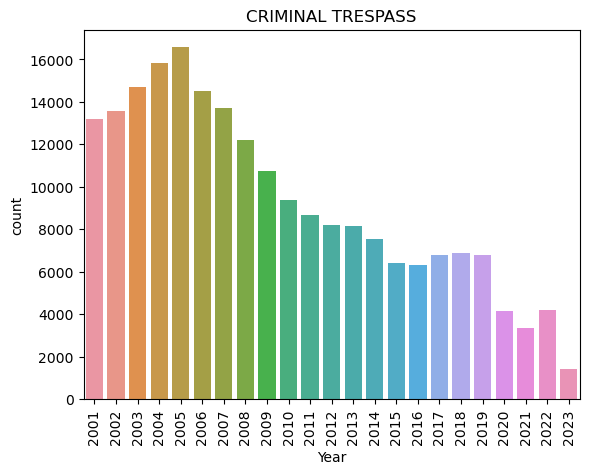

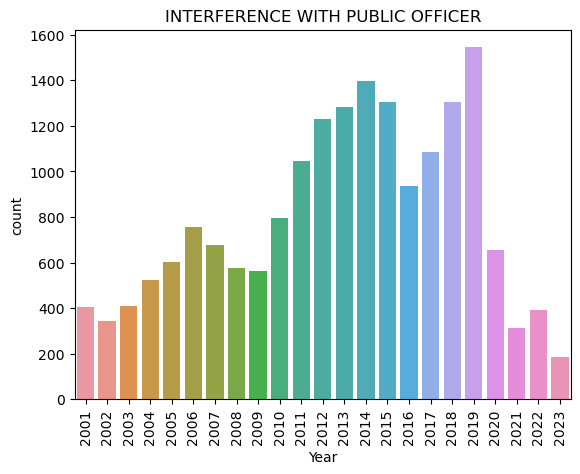

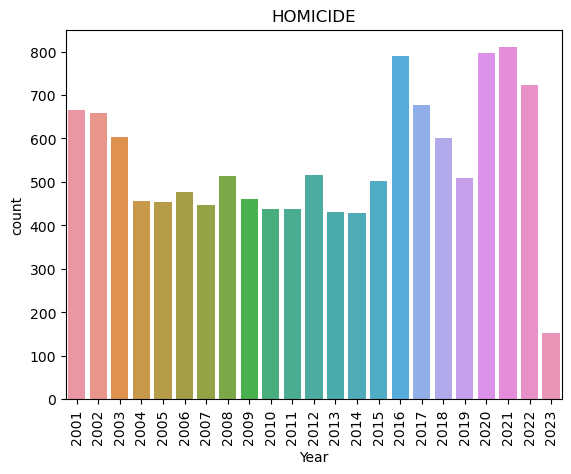

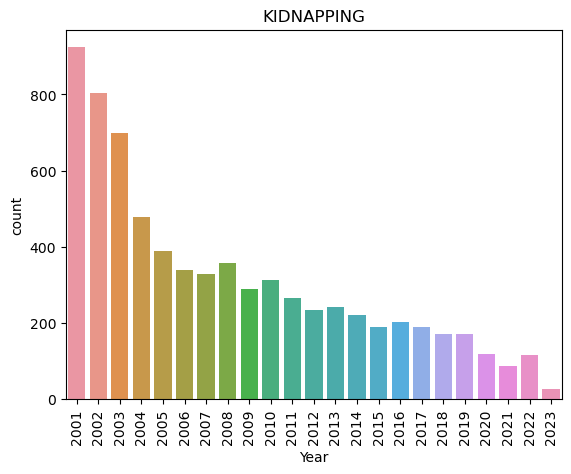

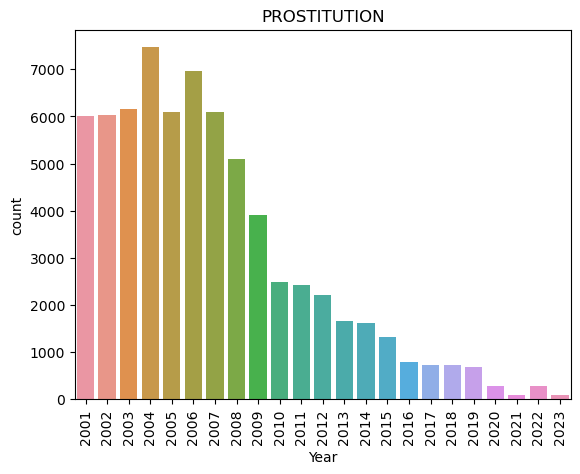

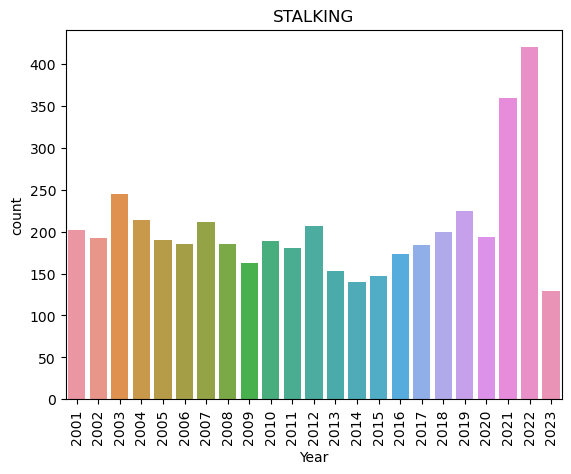

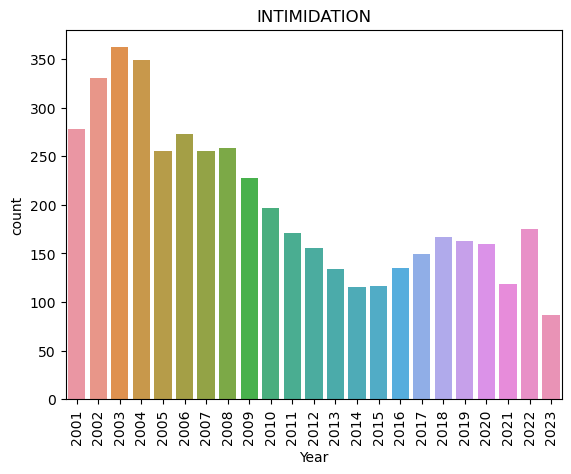

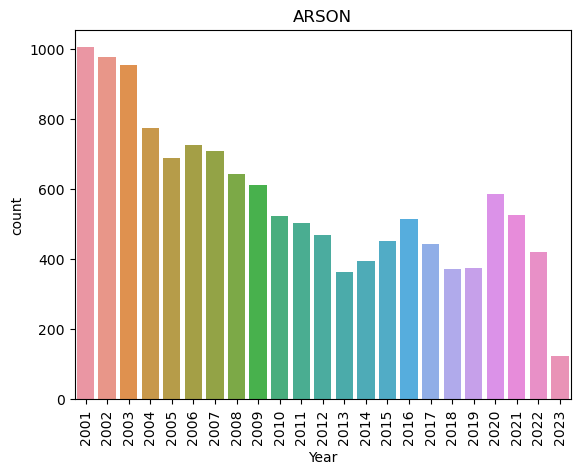

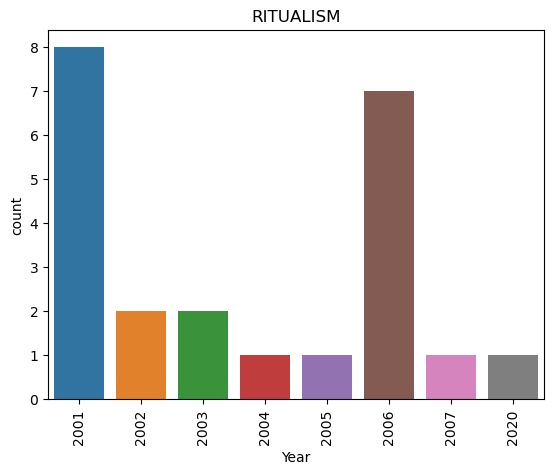

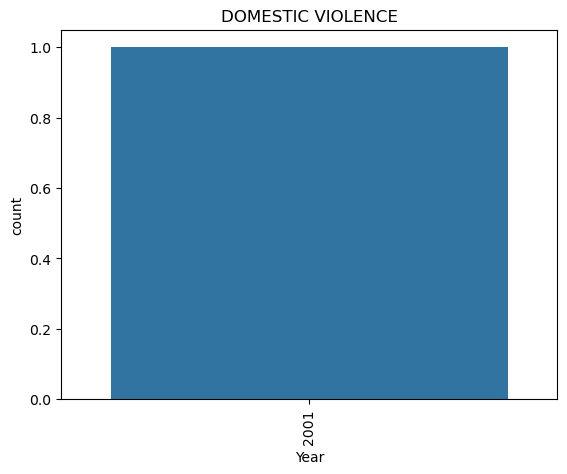

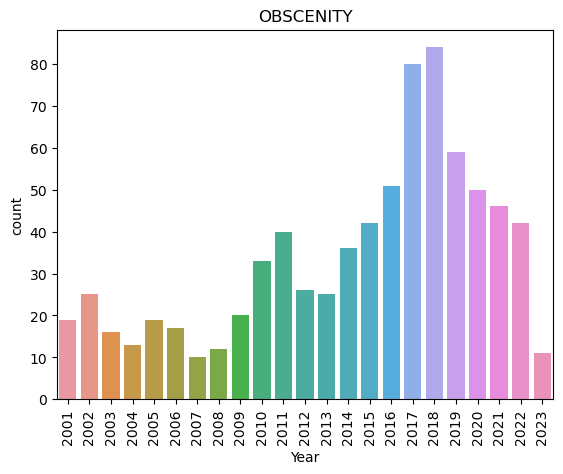

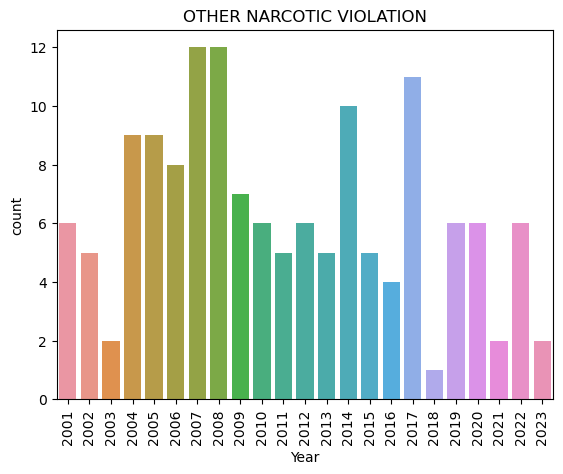

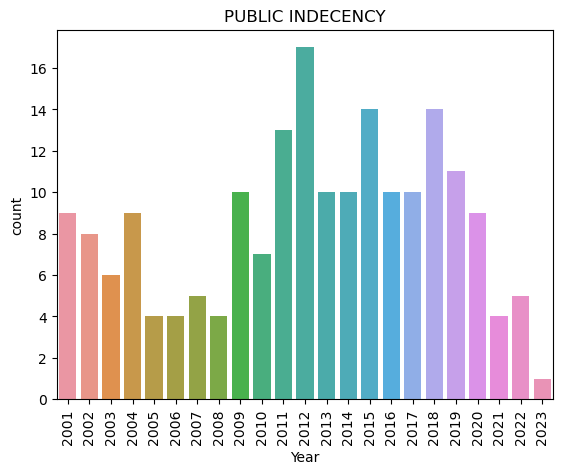

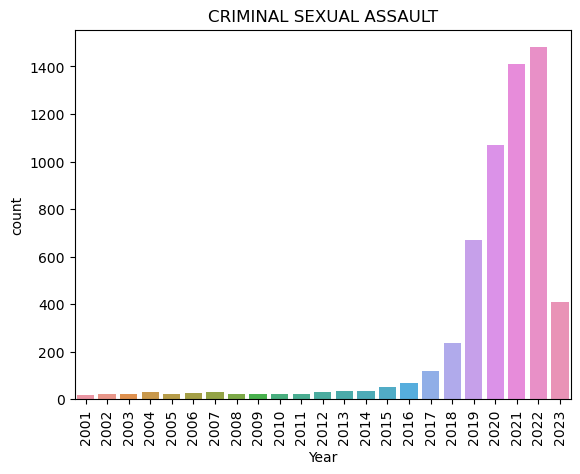

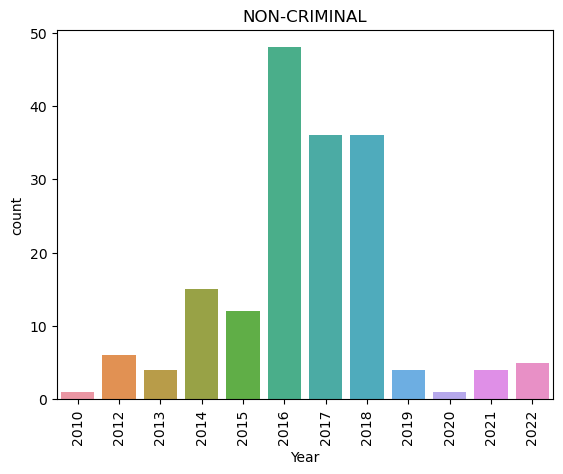

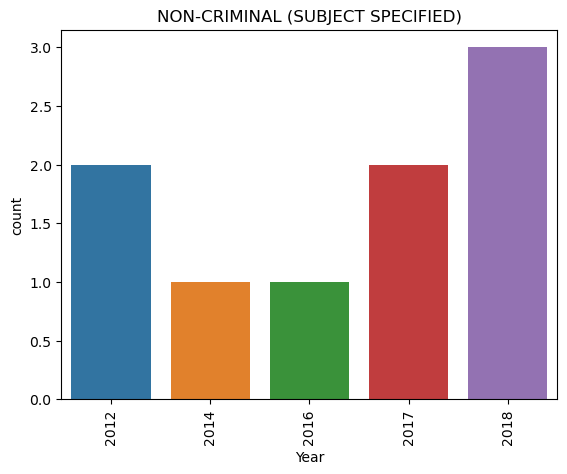

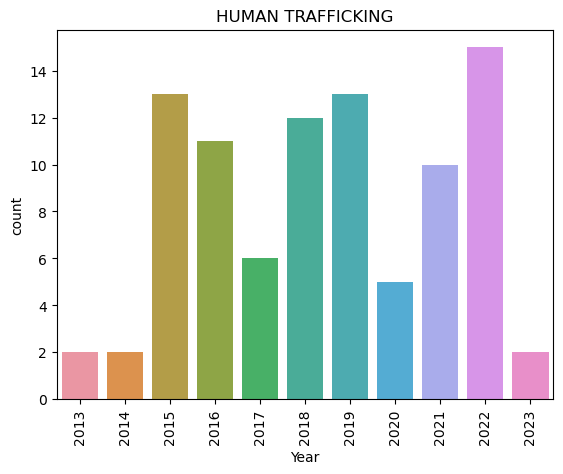

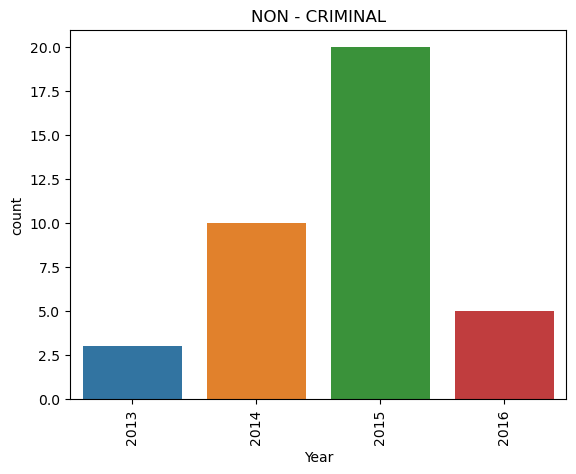

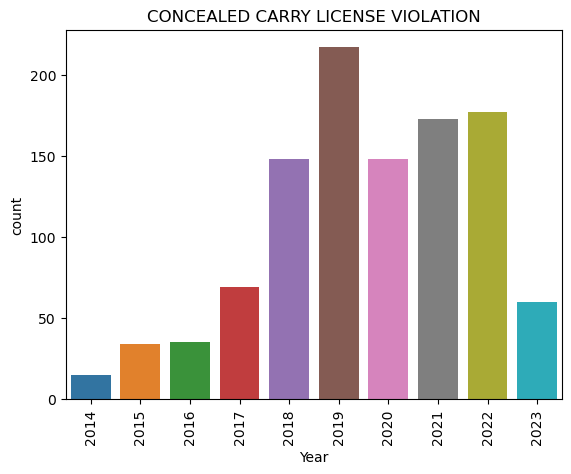

In [81]:
fig, ax = plt.subplots(figsize = (12,3))
for key in crimes.keys():
    plt.figure()
    ax = sns.countplot(data=crimes[key], x='Year').set(title = f"{key}")
    
    plt.xticks(rotation = 90)

## Are crimes more common during AM rush hour (7A-10A) or PM rush hour (4P-7P)? What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour? Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?


Will address this at a later date

In [ ]:
rush_hour_df = df.copy()

## What months have the most crime? What months have the least? Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [82]:
monthly_crime_df = df.copy()

### What months have the most crime?

### What months have the least crime?

### What crimes do not follow the patterns of least and most crime?

## Are there any holidays that show an increase in the # of crimes? Are there any holidays that show a decrease in the # of crimes?

Will address this at a later date.

In [ ]:
holiday_crime_df = df.copy()